# 9주차 Support Vector Machine

지지벡터 기계라고 번역을 하기도 한다. 

대부분 분류 문제에 사용하고, 회귀문제로 가게 되면 SVR(support Vector Regression)이라는 방법을 사용하기도 한다.
SVM 알고리즘의 핵심은 n차원 공간에 있는 데이터들을 가장 잘 구분하는 `경계선` 또는 `경계면(초평면)`을 찾는 것이다.

## 파이썬 Sklearn SVM Parameter

1. Kernel
 - rbf(radial basis function), linear, poly(polynomial)
 - 기본 값으로 rbf를 설정 (값은 특정 중심에서 거리에 의존하는 함수 값)
 
2. C
 - 얼마만큼의 여유를 가지고 오류를 인정할 건지에 대한 값
 - 기본값으로 1.0 설정
 - 값을 낮출 경우 초평면이 매끄러워짐
 - 값을 높일 경우 서포트 벡터들을 다 잘 분류함
 
3. Gamma
 - 기본값으로 auto 설정
 - 값을 낮출 경우 초평면에서 멀리 떨어진 서포트 벡터들의 영향이 낮음
 - 값을 높일 경우 멀리 떨어진 요소들의 값이 영향이 큼
 - 값을 높일 경우 초평면에 인접한 서포트 벡터들의 영향(weight)이 커지기 때문에 초평변이 울퉁불퉁(uneven)하게 됨
 
### SVM Overfitting
과최적화 : 훈련 데이터에 대해서 모델이 최적화된 경우를 의미. 학습 데이터의 패턴을 벗어나는 새로운 데이터에 대해선 분류를 제대로 못하는 경우가 발생한다. Machine Learning에서는 과최적화된 경우를 피해야 한다.

### 1. Python Package 가져오기

In [1]:
import numpy as np # 파이썬 언어를 위한 행렬, 벡터 등의 수학 계산을 위한 자료구조로서 계산 함수를 제공
import pandas as pd # 데이터 분석, 가공, 처리 등을 쉽게 하기 위한 자료구조와 처리 함수들을 제공하는 패키지
import matplotlib.pyplot as plt # matplotlib의 서브패키지로 MATLAB처럼 플롯을 그려주는 시각화 패키지
from sklearn import svm, datasets # skelarn : 분류, 회귀, 군집 등의 문제에 대한 다양한 알고리즘을 제공
                                                   # svm : sklearn 패키지에서 제공하는 Support Vector Machine을 도와주는 모듈
                                                   # datasets : sklearn 패키지에서 제공하는 open datasets를 로드할 때 사용 (iris, tennis, titanic, boston 등)
%matplotlib inline

### 2. Iris dataset 로드하기

In [2]:
iris = datasets.load_iris() # sklearn의 내장 데이터셋을 로드하는 함수 
print(iris.keys())               # dictionary 자료형이 출력되는 것을 볼 수 있음
print(iris.data.shape)       # data라고 하는 key값에 있는 값의 행과 열의 사이즈를 출력(150줄의 데이터와 4개의 속성값을 가지고 있음을 볼 수 있음)
print(iris.feature_names) # data의 feature_names (어떤 속성값을 갖고 있는가)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### 3. Iris dataset 정보 보기

In [3]:
print(iris.DESCR) # sklearn에서 제공하는 open dataset은 DESCR이라는 함수를 통해서 데이터셋에 어떤 정보가 있는지를 확인해볼 수 있다.
'''
Iris Plants Database
====================

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)                  #인스턴스가 15개
    :Number of Attributes: 4 numeric, predictive attributes and the class # 속성이 4개
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:
    
    ============== ==== ==== ======= ===== ====================
                         Min   Max  Mean  SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194  (음의 상관관계)
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!) petal width와 petal length가 클래스를 결정하는 데 많은 역할을 한다!
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================
    
    :Missing Attribute Values: None
    :Class Distribution: 33.3% for each of 3 classes. (50개씩 되어있음)
    :Creator: R.A. Fisher
    :Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
    :Date: July, 1988


'''

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

### 4. 데이터 학습시키기

In [6]:
x = iris.data[: , : 2] # iris 변수에 전체 데이터 중 data에 해당하는 값 중 2개 열과 전체 행 값을 저장한 변수 iras[행,열,2] :  행 0~끝(즉, 150개 데이터), 열 0~1까지 (2는 포함되지 않음)
y = iris.target # iris 변수에 전체 데이터 중 traget에 해당하는 값을 저장한 변수  (0, 1, 2가 각각 50개씩 있음)

In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 1. Linear 함수 Kernel을 사용하고 C값을 1로 하여 모델 구축(훈련) - 정확도 :0.82

In [12]:
SVM = svm.SVC(kernel='linear', C=1).fit(x,y) 
    # 학습된 SVM 모델을 저장한 변수
    # 커널로 linear 함수를 사용
    # C : 값을 작게하면 한쪽의 오분류를 낮추는 대신에 다른 쪽 오분류가 높아지고,
    #      값을 크게하면 양쪽의 오분류를 비슷하게 허용. default=1
    # fit() : 모델 훈련을 시작하는 함수
SVM

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### 5. 데이터 시각화 전처리

### 눈금을 만드는 부분

In [20]:
x_min, x_max = x[ :,0].min()-1, x[:,0].max()+1  #  가로축 처음과 끝 값을 지정하기 위한 변수
y_min, y_max = x[:, 1].min()-1, x[:, 1].max()+1 # 세로축 처음과 끝 값을 지정하기 위한 변수 (여기서 y는 traget이 아님??)
plot_unit = 0.025 # 방안지 눈금 하나의 크기(가로축 세로축 각각 좌표의 크기가 0.025)
                          # 축의 단위를 설정하는 변수(plot을 그릴 때 배경에 세밀한 정도를 나타내기 때문에 그 수치를 낮게 잡아서 세밀하게 확인)
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_unit), np.arange(y_min, y_max, plot_unit)) # plot_unit값만큼 균등하게 간격을 둔 1차원 배열 형태의 데이터를 만든다.
                    # np.meshgrid() 1차원 배열 형태의 데이터들이 주어지면 2차원 배열 형태로 교체한 뒤, xx 그리고 yy 변수에 저장
                    # xx : x가 y의 차원 크기의 행의 개수 만큼 반복된 값을 가지고 있는 변수
                    # yy : y가 x의 차원 크기의 열의 개수 만큼 반복된 값을 가지고 있는 변수

In [19]:
print(x_min)
print(x_max)
print(y_min)
print(y_max)
print("xx :", xx) # 8.9를 포함하지 않는 범위까지 0.025씩 증가(총 150개)
print("yy :", yy) # 5.4를 포함하지 않는 범위까지 0.025씩 증가(세로로 증가)

3.3
8.9
1.0
5.4
xx : [[ 3.3    3.325  3.35  ...,  8.825  8.85   8.875]
 [ 3.3    3.325  3.35  ...,  8.825  8.85   8.875]
 [ 3.3    3.325  3.35  ...,  8.825  8.85   8.875]
 ..., 
 [ 3.3    3.325  3.35  ...,  8.825  8.85   8.875]
 [ 3.3    3.325  3.35  ...,  8.825  8.85   8.875]
 [ 3.3    3.325  3.35  ...,  8.825  8.85   8.875]]
yy : [[ 1.     1.     1.    ...,  1.     1.     1.   ]
 [ 1.025  1.025  1.025 ...,  1.025  1.025  1.025]
 [ 1.05   1.05   1.05  ...,  1.05   1.05   1.05 ]
 ..., 
 [ 5.325  5.325  5.325 ...,  5.325  5.325  5.325]
 [ 5.35   5.35   5.35  ...,  5.35   5.35   5.35 ]
 [ 5.375  5.375  5.375 ...,  5.375  5.375  5.375]]


### 6. 데이터 시각화 및 성능 측정
  커널 parameter를 linear로 주었기 떄문에 선으로 데이터를 분류한 결과를 확인할 수 있다.

In [22]:
### 들어가기전 ravel 함수 설명 
## ravel 함수는 두 개의 배열을 합쳐서 하나의 배열로 만드는 기능
## numpy.c_[ , ] : 두 개의 배열 쌍을 합쳐 하나의 배열을 구성

x1 = np.array([[1,2,3,], [1,2,3]])
y1 = np.array([[4,5,6], [4,5,6]])
print(np.ravel(x1)) # 1차원으로 바뀜
print(np.c_[x1.ravel(), y1.ravel()]) # 대응되는 값을 '쌍'으로 만들어줌

[1 2 3 1 2 3]
[[1 4]
 [2 5]
 [3 6]
 [1 4]
 [2 5]
 [3 6]]


In [37]:
z = SVM.predict(np.c_[xx.ravel(), yy.ravel()]) # xx와 yy 변수에 저장된 행렬의 1행부터 순차적으로 값을 불러와서 1차원 배열을 만든다.
                                                                # 이렇게 만든 배열을 np.c_[ ] 함수를 이용해 다시 2차원 배열로 만들어준다.
                                                                # 학습된 SVM 모델에 데이터를 입력한 후,
                                                                # predict() : sepal length와 sepal width 각 좌표값에 따라 클래스를 분류한다.
                                                                # 어떤 class의 값인지 분류한 결과를 z라고 하는 변수에 저장한다.

z = z.reshape(xx.shape)# z변수의 차원을 xx변수의 차원과 같은 차원으로 '재형성'한 다음에 다시 z 변수에 저장한다. 해당 차원을 같게 만들어준 이유는 plot을 할 때 같은 차원의 데이터를 사용해야 하기 떄문이다.
                
print(np.c_[xx.ravel(), yy.ravel()]) # 짝을 지어서 새로운 array를 만듦.
print("--------------------------------------------")
print("z.shape : ", z.shape) # z값은 39,424개
print("--------------------------------------------")
print("xx.shpae : ", xx.shape)
print("--------------------------------------------")
print("z (176x224): ", z)

[[ 3.3    1.   ]
 [ 3.325  1.   ]
 [ 3.35   1.   ]
 ..., 
 [ 8.825  5.375]
 [ 8.85   5.375]
 [ 8.875  5.375]]
--------------------------------------------
z.shape :  (176, 224)
--------------------------------------------
xx.shpae :  (176, 224)
--------------------------------------------
z (176x224):  [[1 1 1 ..., 2 2 2]
 [1 1 1 ..., 2 2 2]
 [1 1 1 ..., 2 2 2]
 ..., 
 [0 0 0 ..., 2 2 2]
 [0 0 0 ..., 2 2 2]
 [0 0 0 ..., 2 2 2]]


### (복기) Linear 함수 Kernel을 사용하고 C값을 1로 하여 모델 구축(훈련) - 정확도 :0.82

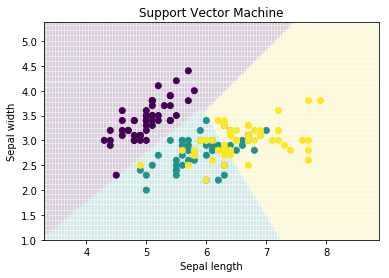

정확도 :  0.82


In [36]:
plt.pcolormesh(xx, yy, z, alpha=0.05) # xx, yy 좌표에 해당하는 x값에 따라 색상을 다르게 적용한다.투명도는 0.1
plt.scatter(x[:,0], x[:, 1], c=y)           # x변수 첫 번째 컬럼에 저장된 데이터를 x축, 두 번째 컬럼을 y축으로 하여 산점도를 그린다.
                                                    # training data의 sepal length = [ :, 0], sepal width = [x:, 1]

plt.xlabel('Sepal length') # x축 이름 설정
plt.ylabel('Sepal width') # y축 이름 설정
plt.xlim(xx.min(), xx.max()) # plot으로 보여줄 x축의 범위를 xx.min() 값에서 xx.max()라고 하는 함수의 리턴값을 지정해서 보여준다.
plt.title('Support Vector Machine') # plot의 제목 설정
plt.show() # 입력된 plot을 화면에 출력한다.
print("정확도 : ", SVM.score(X=x, y=y)) # 학습된 SVM모델을 통해서 입력된 데이터를 분류한 뒤에 실제 값과 비교해 분류 정확도를 출력


## 최종적으로 그림을 보면 오분류된게 조금씩 있음 (정확도=0.82). c값을 변화시켜보자.

### 2. RBF 함수 Kernel을 사용하고, C값을 1로 하여 모델 구축 - 정확도 0.826

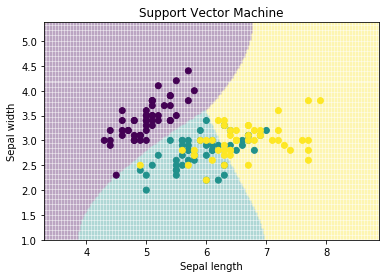

정확도 :  0.826666666667


In [42]:
SVM = svm.SVC(kernel='rbf', C=1).fit(x, y)
rbf_z = SVM.predict(np.c_[xx.ravel(), yy.ravel()])
rbf_z = rbf_z.reshape(xx.shape)
plt.pcolormesh(xx, yy, rbf_z, alpha=0.1)
plt.scatter(x[:,0], x[:, 1], c=y)
plt.xlabel('Sepal length') # x축 이름 설정
plt.ylabel('Sepal width') # y축 이름 설정
plt.xlim(xx.min(), xx.max()) # plot으로 보여줄 x축의 범위를 xx.min() 값에서 xx.max()라고 하는 함수의 리턴값을 지정해서 보여준다.
plt.title('Support Vector Machine') # plot의 제목 설정
plt.show() # 입력된 plot을 화면에 출력한다.
print("정확도 : ", SVM.score(X=x, y=y)) # 학습된 SVM모델을 통해서 입력된 데이터를 분류한 뒤에 실제 값과 비교해 분류 정확도를 출력

### 3. RBF 함수 Kernel을 사용하고, C값을 1, Gamma=10으로 하여 모델 구축 - 정확도 0.84

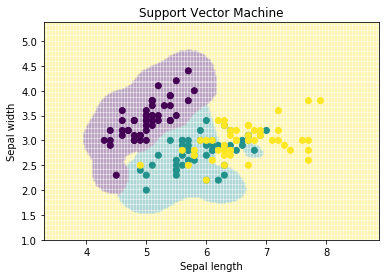

정확도 :  0.84


In [46]:
SVM = svm.SVC(kernel='rbf', C=1, gamma=10).fit(x, y)
rbf_gamma_z = SVM.predict(np.c_[xx.ravel(), yy.ravel()])
rbf_gamma_z = rbf_gamma_z.reshape(xx.shape)
plt.pcolormesh(xx, yy, rbf_gamma_z, alpha=0.1)
plt.scatter(x[:,0], x[:, 1], c=y)
plt.xlabel('Sepal length') # x축 이름 설정
plt.ylabel('Sepal width') # y축 이름 설정
plt.xlim(xx.min(), xx.max()) # plot으로 보여줄 x축의 범위를 xx.min() 값에서 xx.max()라고 하는 함수의 리턴값을 지정해서 보여준다.
plt.title('Support Vector Machine') # plot의 제목 설정
plt.show() # 입력된 plot을 화면에 출력한다.
print("정확도 : ", SVM.score(X=x, y=y)) # 학습된 SVM모델을 통해서 입력된 데이터를 분류한 뒤에 실제 값과 비교해 분류 정확도를 출력

### 4. RBF 함수 Kernel을 사용하고, C값을 1, Gamma=100으로 하여 모델 구축 - 정확도 0.92

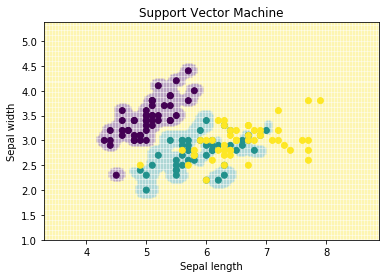

정확도 :  0.92


In [48]:
SVM = svm.SVC(kernel='rbf', C=1, gamma=100).fit(x, y)
rbf_gamma100_z = SVM.predict(np.c_[xx.ravel(), yy.ravel()])
rbf_gamma100_z = rbf_gamma100_z.reshape(xx.shape)
plt.pcolormesh(xx, yy, rbf_gamma100_z, alpha=0.1)
plt.scatter(x[:,0], x[:, 1], c=y)
plt.xlabel('Sepal length') # x축 이름 설정
plt.ylabel('Sepal width') # y축 이름 설정
plt.xlim(xx.min(), xx.max()) # plot으로 보여줄 x축의 범위를 xx.min() 값에서 xx.max()라고 하는 함수의 리턴값을 지정해서 보여준다.
plt.title('Support Vector Machine') # plot의 제목 설정
plt.show() # 입력된 plot을 화면에 출력한다.
print("정확도 : ", SVM.score(X=x, y=y)) # 학습된 SVM모델을 통해서 입력된 데이터를 분류한 뒤에 실제 값과 비교해 분류 정확도를 출력


# 단, 문제는 과최적화(overfiitin, 즉 훈련데이터에만 적합한 모델이 된 것은 아닌가 의심해봐야 한다.)

# SVMl Paremeter 조정법
## 데이터 파라미터 조정 및 성능 측정
 kernel 파라미터를 `rbf`로 변경하면 선형이 아닌 비선형으로 분류된다.
 ![스크린샷, 2017-11-10 02-21-14](https://i.imgur.com/vxWGoSp.png)
 
 ![스크린샷, 2017-11-10 02-23-43](https://i.imgur.com/S9gIpTJ.png)
 Gomma값을 낮추면 멀리 떨어진 서포트 벡터(support vector)들의 영향이 낮아지고, 값을 높이면 멀리 떨어진 벡터들의 값이 영향을 크게 하는 파라미터가 된다.
![스크린샷, 2017-11-10 02-23-29](https://i.imgur.com/wmBBEId.png)
Gamma=100이 되면 margin이 매우 많이 작아진 것을 확인할 수 있고, 성능이 향상되었지만 Overfiiting의 문제가 있다.

C값은 default값이 1.0인데, 이 값을 낮추면 초평면이 매끄러워진다. 값을 높이면 서포트 벡터들을 더욱 세미할게 분류하게 된다.

![스크린샷, 2017-11-10 02-26-27](https://i.imgur.com/W06m0nS.png)
C=1로 설정하면, 초평면이 매끄럽게 나온다.
![스크린샷, 2017-11-10 02-26-35](https://i.imgur.com/HP6cMtM.png)
C=100으로 설정하면, 초평면이 더욱 작아지면서 마진이 작아진다.
이유는 C값을 조절하면 멀리 있는 벡터도 서포트 벡터로 설정하기 때문이다.
![스크린샷, 2017-11-10 02-28-10](https://i.imgur.com/ltIUbjQ.png)
C=1000으로 설정하면, C값을 100으로 주었을 때와 유사하다.

Parameter를 높일 경우 성능을 높일 수 있음. But, 과도하게 높일 경우 과최적화의 문제가 발생한다.